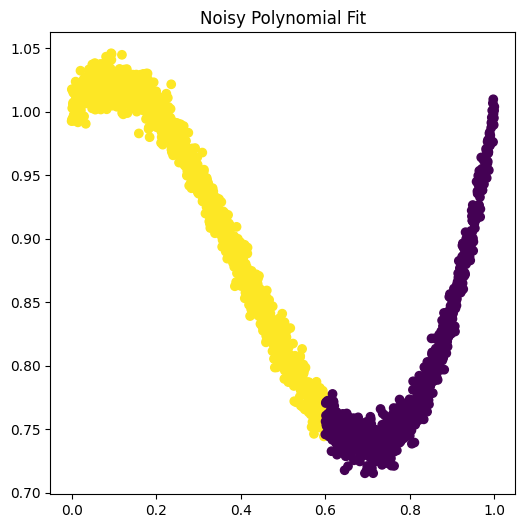

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Ustalanie parametrów szeregu czasowego
n_samples = 2000  # Liczba próbek
t1 = np.linspace(0, 1, n_samples) 

# Generowanie trendu wielomianowego stopnia 3
coefficients = [2.5, -3, 0.5, 1]  # Współczynniki wielomianu
polynomial_trend = np.polyval(coefficients, t1)

# Dodawanie szumu gaussowskiego
noise = np.random.normal(0, 0.01, n_samples)

# Syntetyczny szereg czasowy jako suma trendu wielomianowego i szumu
t2 = polynomial_trend + noise

X1 = np.concatenate((t1.reshape(-1,1), t2.reshape(-1,1)), axis=1)

y1 = t1<0.6

n_genes = 100

proj = np.random.normal(size=(n_genes, 2))


plt.figure(figsize=(6, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis')
plt.title('Noisy Polynomial Fit')
plt.show()

X1 = np.dot(X1, proj.T)
X1 += np.random.normal(size=(n_samples, n_genes))

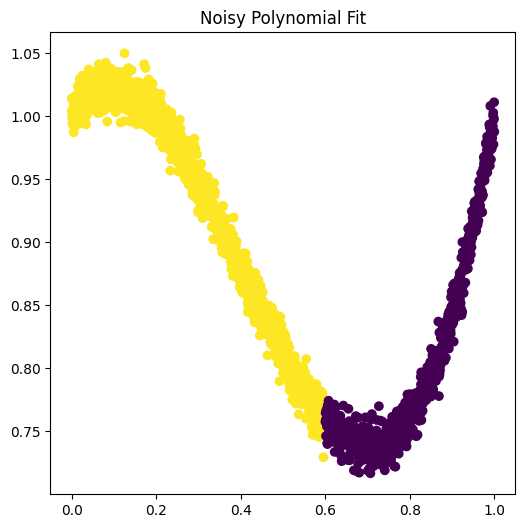

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Ustalanie parametrów szeregu czasowego
t1 = np.linspace(0, 1, n_samples)  # Oś czasu

# Generowanie trendu wielomianowego stopnia 3
coefficients = [2.5, -3, 0.5, 1]  # Współczynniki wielomianu
polynomial_trend = np.polyval(coefficients, t1)

# Dodawanie szumu gaussowskiego
noise = np.random.normal(0, 0.01, n_samples)

# Syntetyczny szereg czasowy jako suma trendu wielomianowego i szumu
t2 = polynomial_trend + noise

X2 = np.concatenate((t1.reshape(-1,1), t2.reshape(-1,1)), axis=1)

y2 = t1<0.6


proj = np.random.normal(size=(n_genes, 2))


plt.figure(figsize=(6, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='viridis')
plt.title('Noisy Polynomial Fit')
plt.show()

X2 = np.dot(X2, proj.T)
X2 += np.random.normal(size=(n_samples, n_genes))

In [107]:
import numpy
def total_correlation(X1, X2, k):
    r1 = 1e-4
    r2 = 1e-4

    n1 = X1.shape[1] 
    n2 = X2.shape[1]
    m = X1.shape[0] #number of rows

    mean1 = numpy.mean(X1, axis=0)
    mean2 = numpy.mean(X2, axis=0)

    H1bar = X1 - numpy.tile(mean1, (m, 1))
    H2bar = X2 - numpy.tile(mean2, (m, 1))


    SigmaHat12 = (1.0 / (m - 1)) * numpy.dot(H1bar.T, H2bar)
    SigmaHat11 = (1.0 / (m - 1)) * numpy.dot(H1bar.T, H1bar) + r1 * numpy.identity(n1)
    SigmaHat22 = (1.0 / (m - 1)) * numpy.dot(H2bar.T, H2bar) + r2 * numpy.identity(n2)


    [D1, V1] = numpy.linalg.eigh(SigmaHat11) #Eigendecomposition for easy inversion
    [D2, V2] = numpy.linalg.eigh(SigmaHat22) #Eigendecomposition for easy inversion
    SigmaHat11RootInv = numpy.dot(numpy.dot(V1, numpy.diag(D1 ** -0.5)), V1.T) #
    SigmaHat22RootInv = numpy.dot(numpy.dot(V2, numpy.diag(D2 ** -0.5)), V2.T)
    T = numpy.dot(numpy.dot(SigmaHat11RootInv, SigmaHat12), SigmaHat22RootInv)
    

    [U, D, V] = numpy.linalg.svd(T)
    V = V.T
    A1star = numpy.dot(SigmaHat11RootInv, U[:, 0:k])
    A2star = numpy.dot(SigmaHat22RootInv, V[:, 0:k])
    D = D[0:k]

    top_k_singular_values = D[:k]

    total_corr = numpy.sum(D)

    return A1star, total_corr, A2star

In [108]:
A1, total_corr, A2 = total_correlation(X1, X2, k=2)

In [109]:
total_corr

1.3486142999350053

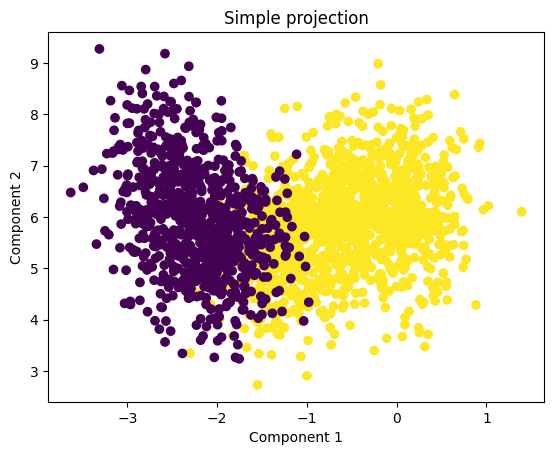

In [110]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

plt.scatter((X1 @ A1)[:, 0], (X1 @ A1)[:, 1], c=y1)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Simple projection')
plt.show()


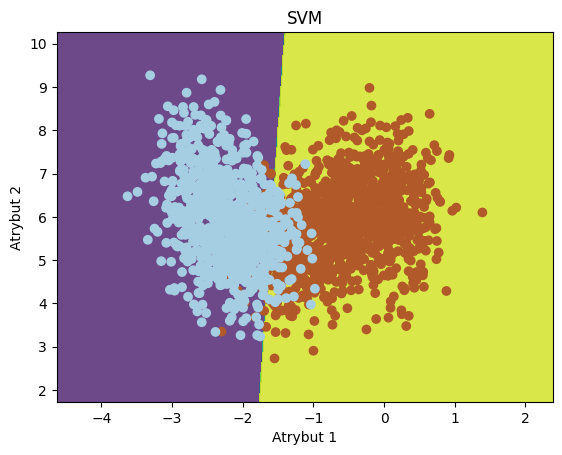

In [167]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# Przygotowanie danych treningowych
X = (X1 @ A1)
y = y1

# Inicjalizacja i trenowanie klasyfikatora SVM

# Inicjalizacja i trenowanie klasyfikatora SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Wygenerowanie siatki punktów w celu wizualizacji granicy decyzyjnej
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Wykonanie predykcji dla każdego punktu siatki
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Wyświetlenie granicy decyzyjnej i danych treningowych
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Atrybut 1')
plt.ylabel('Atrybut 2')
plt.title('SVM')
plt.show()


In [165]:
Z = clf.predict(X)

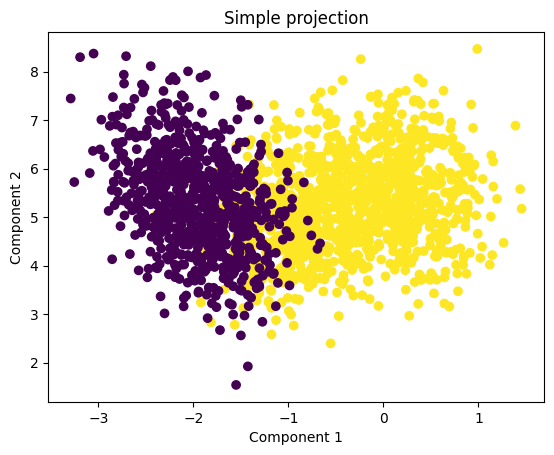

In [111]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

plt.scatter((X2 @ A2)[:, 0], (X2 @ A2)[:, 1], c=y1)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Simple projection')
plt.show()


In [156]:


import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, concatenate, Dropout, LeakyReLU, BatchNormalization
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
from dcca import  CCA
from keras.optimizers import Adam, RMSprop

def constant_loss(y_true, y_pred):
    return y_pred

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


#train_set_x1, valid_set_x1, train_set_x2, valid_set_x2 = train_test_split(X, Y, test_size=0.20)

# size of the input for view 1 and view 2
input_shape1 = 100
input_shape2 = 100

# network settings
epoch_num = 30


batch_size = 200
#load data

LeaklyRelu = tf.keras.layers.LeakyReLU(alpha=0.7)

input1 = Input(shape=(input_shape1, ), name='input1')
input2 = Input(shape=(input_shape2, ), name='input2')

expert_index = 0
# Definicja funkcji aktywacji
activation_model = LeaklyRelu

# Warstwy wejściowe
input1 = Input(shape=(input_shape1,))
input2 = Input(shape=(input_shape2,))

# Warstwy gęste dla widoku 1
normalizaction_1 = BatchNormalization()(input1)
dense1_1 = Dense(10, activation=activation_model, name='view_1_1')(normalizaction_1)
dense1_2 = Dense(5, activation=activation_model, name='view_1_2')(dense1_1)
dense1_3 = Dense(2, activation=activation_model, name='view_1_3')(dense1_2)
output1 = Dense(2, activation='linear', name='view_1_4')(dense1_3)

# Warstwy gęste dla widoku 2
normalizaction_2 = BatchNormalization()(input2)
dense2_1 = Dense(10, activation=activation_model, name='view_2_1')(normalizaction_2)
dense2_2 = Dense(5, activation=activation_model, name='view_2_2')(dense2_1)
dense2_3 = Dense(2, activation=activation_model, name='view_2_3')(dense2_2)
output2 = Dense(2, activation='linear', name='view_2_4')(dense2_3)


# Warstwa łącząca
shared_layer = concatenate([output1, output2], name='shared_layer')

# Normalizacja danych
shared_layer = BatchNormalization()(shared_layer)

cca_layer = CCA(1, name='cca_layer')(shared_layer)

model = Model(inputs=[input1, input2], outputs=cca_layer)
model.compile(optimizer=Adam(lr=0.01), loss=constant_loss, metrics=[mean_pred])
model.fit([X1, X2], np.zeros(len(X1)),
          batch_size=batch_size, epochs=epoch_num, shuffle=True, verbose=1)



Epoch 1/30
10/10 [==============================] - 2s 7ms/step - loss: -0.7492 - mean_pred: -0.7492
Epoch 2/30
10/10 [==============================] - 0s 8ms/step - loss: -1.2336 - mean_pred: -1.2336
Epoch 3/30
10/10 [==============================] - 0s 7ms/step - loss: -1.2658 - mean_pred: -1.2658
Epoch 4/30
10/10 [==============================] - 0s 8ms/step - loss: -1.2976 - mean_pred: -1.2976
Epoch 5/30
10/10 [==============================] - 0s 8ms/step - loss: -1.3802 - mean_pred: -1.3802
Epoch 6/30
10/10 [==============================] - 0s 8ms/step - loss: -1.5278 - mean_pred: -1.5278
Epoch 7/30
10/10 [==============================] - 0s 8ms/step - loss: -1.6163 - mean_pred: -1.6163
Epoch 8/30
10/10 [==============================] - 0s 8ms/step - loss: -1.6497 - mean_pred: -1.6497
Epoch 9/30
10/10 [==============================] - 0s 8ms/step - loss: -1.6612 - mean_pred: -1.6612
Epoch 10/30
10/10 [==============================] - 0s 7ms/step - loss: -1.6763 - mean_pre

In [157]:
current_dcca = Model(model.input, model.get_layer(name='shared_layer').output)


pred_out = current_dcca.predict([X1, X2])

63/63 [==============================] - 0s 2ms/step


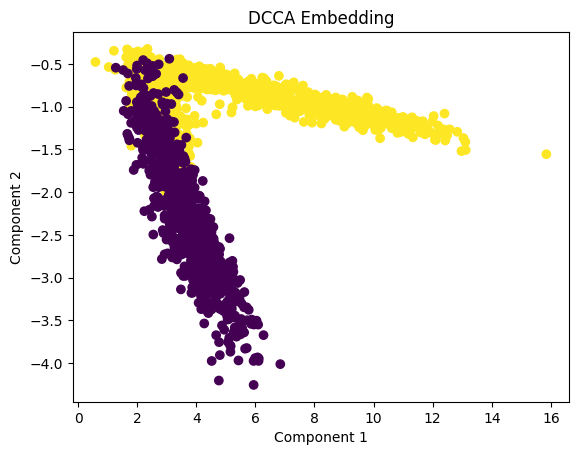

In [158]:
import matplotlib.pyplot as plt

plt.scatter(pred_out[:, 0], pred_out[:, 1], c=y1)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('DCCA Embedding')
plt.show()


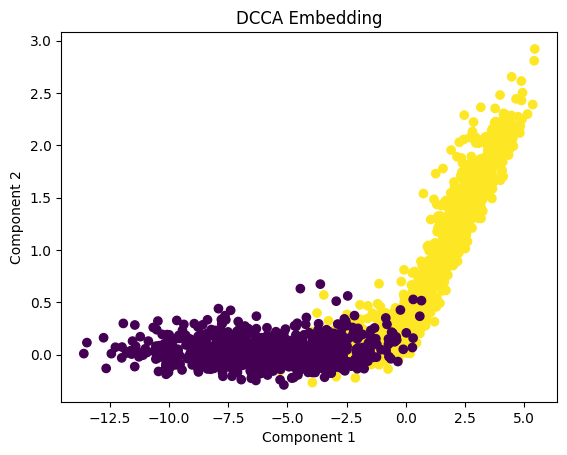

In [159]:
import matplotlib.pyplot as plt

plt.scatter(pred_out[:, 2], pred_out[:, 3], c=y2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('DCCA Embedding')
plt.show()


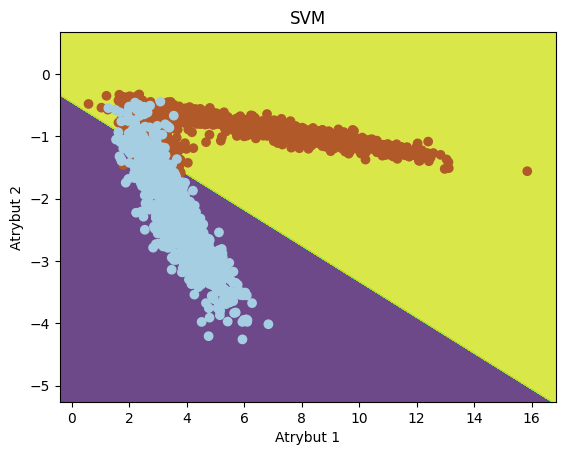

In [169]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# Przygotowanie danych treningowych
X = pred_out[:,0:2]
y = y1


# Inicjalizacja i trenowanie klasyfikatora SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Wygenerowanie siatki punktów w celu wizualizacji granicy decyzyjnej
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Wykonanie predykcji dla każdego punktu siatki
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Wyświetlenie granicy decyzyjnej i danych treningowych
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Atrybut 1')
plt.ylabel('Atrybut 2')
plt.title('SVM')
plt.show()
